In [1]:
#pip install skforecast

In [2]:
#pip install pmdarima

In [17]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd
import os

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Hyperparamter Optmization
# ==============================================================================
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster

# Model Metrics
# ==============================================================================
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Warnings configuration
# ==============================================================================
import warnings
#warnings.filterwarnings('ignore')

In [4]:
rsmes = []
maes = []
r2s = []

In [5]:
MONTHLY_DATA_PATH = os.path.abspath(r"..\data").replace('\\','/') + '/processed/monthly_rainfall.xlsx'
WEEKLY_DATA_PATH = os.path.abspath(r"..\data").replace('\\','/') + '/processed/weekly_rainfall_avg.xlsx'
DAILY_DATA_PATH = os.path.abspath(r"..\data").replace('\\','/') + '/processed/daily_rainfall.xlsx'

monthly_df = pd.read_excel(MONTHLY_DATA_PATH, 
                           index_col=[0],
                           parse_dates=[0])

monthly_df.index.freq = 'MS' 

weekly_df = pd.read_excel(WEEKLY_DATA_PATH,
                          index_col=[0],
                          parse_dates=[0])

daily_df = pd.read_excel(DAILY_DATA_PATH,
                         index_col=[0], 
                         parse_dates=[0])

In [6]:
monthly_df.head()

monhtly_avg
months                 
2014-01-01         60.0
2014-02-01        101.5
2014-03-01        133.5
2014-04-01        117.0
2014-05-01         16.5

In [7]:
monthly_df.shape

(96, 1)

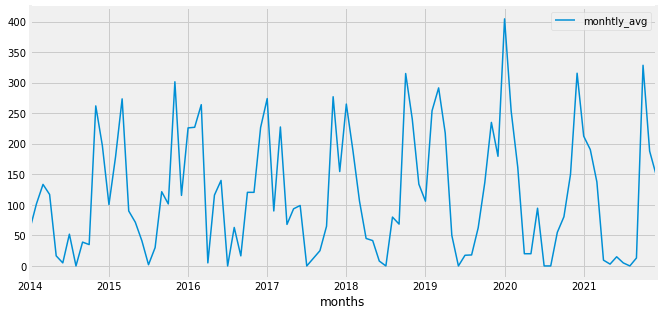

In [8]:
monthly_df.plot(figsize=(10,5))
plt.show()

In [9]:
data = monthly_df.copy()

Train dates : 2014-01-01 00:00:00 --- 2019-12-01 00:00:00  (n=72)
Test dates  : 2020-01-01 00:00:00 --- 2021-12-01 00:00:00  (n=24)


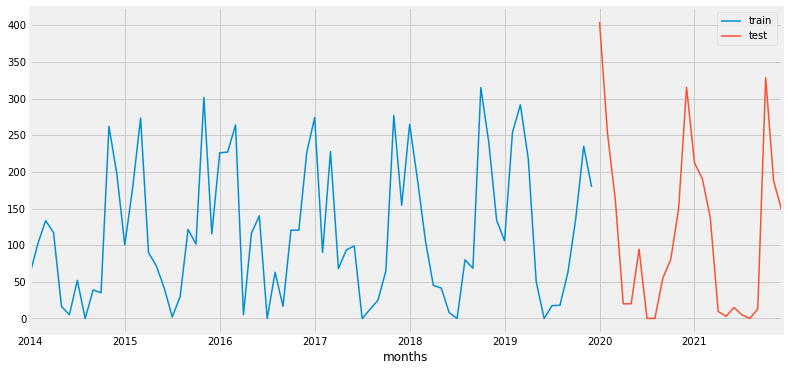

In [10]:
steps = 24
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax = plt.subplots(figsize=(12,6))
data_train['monhtly_avg'].plot(ax=ax, label='train')
data_test['monhtly_avg'].plot(ax=ax, label='test')
ax.legend();

SARIMA com autoarima pelo critério AIC # apagar depois

In [11]:
stepwise_model = auto_arima(data_train, max_order=100, start_p=0, max_p = 7, start_q = 0, max_q = 3, m = 12,
                  seasonal = True, start_P = 0, max_P = 3, start_Q = 0, max_Q = 3,
                  trace = True, error_action = 'ignore', suppress_warnings = True,
                  stepwise = False )

stepwise_model.fit(data_train)
predictions = stepwise_model.predict(n_periods = 24)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=860.523, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=847.482, Time=0.15 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=844.234, Time=0.29 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=844.382, Time=0.58 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=839.700, Time=0.13 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=836.031, Time=0.60 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=838.127, Time=1.20 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=838.334, Time=0.34 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=838.547, Time=1.14 sec
 ARIMA(0,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(0,0,0)(3,0,2)[12] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(0,0,0)(3,0,3)[12] intercept

 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=844.569, Time=0.23 sec
 ARIMA(2,0,0)(0,0,2)[12] intercept   : AIC=841.569, Time=0.44 sec
 ARIMA(2,0,0)(0,0,3)[12] intercept   : AIC=843.256, Time=1.01 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=840.298, Time=0.30 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,0,0)(1,0,2)[12] intercept   : AIC=838.481, Time=0.69 sec
 ARIMA(2,0,0)(1,0,3)[12] intercept   : AIC=841.604, Time=1.41 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=839.222, Time=0.55 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=842.006, Time=0.87 sec
 ARIMA(2,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(2,0,0)(2,0,3)[12] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=840.799, Time=1.42 sec
 ARIMA(2,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(2,0,0)(3,0,2)[12] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(2,0,0)(3,0,3)[12] intercept   : AIC=inf, Time=2.28 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept

 ARIMA(4,0,0)(0,0,2)[12] intercept   : AIC=844.615, Time=0.38 sec
 ARIMA(4,0,0)(0,0,3)[12] intercept   : AIC=846.307, Time=1.33 sec
 ARIMA(4,0,0)(1,0,0)[12] intercept   : AIC=842.933, Time=0.37 sec
 ARIMA(4,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(4,0,0)(1,0,2)[12] intercept   : AIC=843.023, Time=0.85 sec
 ARIMA(4,0,0)(1,0,3)[12] intercept   : AIC=848.222, Time=1.10 sec
 ARIMA(4,0,0)(2,0,0)[12] intercept   : AIC=842.445, Time=0.90 sec
 ARIMA(4,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(4,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(4,0,0)(2,0,3)[12] intercept   : AIC=inf, Time=2.33 sec
 ARIMA(4,0,0)(3,0,0)[12] intercept   : AIC=846.577, Time=1.92 sec
 ARIMA(4,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(4,0,0)(3,0,2)[12] intercept   : AIC=inf, Time=2.28 sec
 ARIMA(4,0,0)(3,0,3)[12] intercept   : AIC=inf, Time=3.00 sec
 ARIMA(4,0,1)(0,0,0)[12] intercept   : AIC=842.199, Time=0.31 sec
 ARIMA(4,0,1)(0,0,1)[12] intercept   :

 ARIMA(6,0,0)(1,0,0)[12] intercept   : AIC=843.610, Time=0.57 sec
 ARIMA(6,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(6,0,0)(1,0,2)[12] intercept   : AIC=845.770, Time=0.79 sec
 ARIMA(6,0,0)(1,0,3)[12] intercept   : AIC=847.688, Time=1.81 sec
 ARIMA(6,0,0)(2,0,0)[12] intercept   : AIC=845.626, Time=1.13 sec
 ARIMA(6,0,0)(2,0,1)[12] intercept   : AIC=854.027, Time=1.55 sec
 ARIMA(6,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(6,0,0)(2,0,3)[12] intercept   : AIC=inf, Time=2.72 sec
 ARIMA(6,0,0)(3,0,0)[12] intercept   : AIC=847.628, Time=2.77 sec
 ARIMA(6,0,0)(3,0,1)[12] intercept   : AIC=847.710, Time=3.24 sec
 ARIMA(6,0,0)(3,0,2)[12] intercept   : AIC=inf, Time=3.18 sec
 ARIMA(6,0,0)(3,0,3)[12] intercept   : AIC=inf, Time=3.39 sec
 ARIMA(6,0,1)(0,0,0)[12] intercept   : AIC=842.206, Time=0.39 sec
 ARIMA(6,0,1)(0,0,1)[12] intercept   : AIC=842.177, Time=0.56 sec
 ARIMA(6,0,1)(0,0,2)[12] intercept   : AIC=845.957, Time=1.03 sec
 ARIMA(6,0,1)(0,0,3)[12] inter

Mean Absolute Error (MAE): 67.35
Root Mean Squared Error (RSME): 87.23
Correlation Coefficient: 0.45


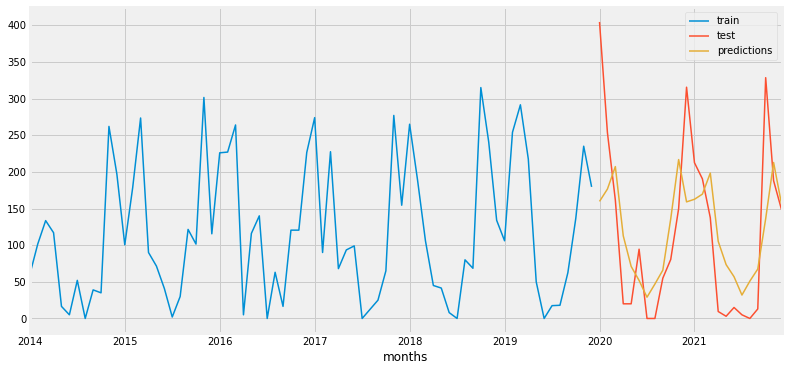

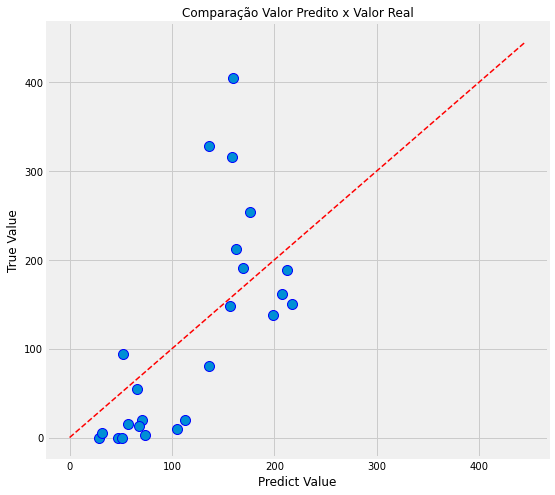

In [12]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(12,6))
data_train['monhtly_avg'].plot(ax=ax, label='train')
data_test['monhtly_avg'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

error_mse = mean_squared_error(
                y_true = data_test,
                y_pred = predictions
            )

error_mae = mean_absolute_error(
                y_true = data_test,
                y_pred = predictions
            )

rsmes.append(error_mse**0.5)

maes.append(error_mae)

print(f"Mean Absolute Error (MAE): {error_mae:.2f}")

print(f"Root Mean Squared Error (RSME): {error_mse**0.5:.2f}")

print(f"Correlation Coefficient: {r2_score(data_test, predictions):.2f}")
r2s.append(r2_score(data_test, predictions))




# Vamos criar um gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(predictions.values, data_test.values, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(data_test.values), 1.2*max(data_test.values),(max(data_test.values)-min(data_test.values))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

SARIMA com GridSearch # apagar depois

In [13]:
list_order = [(p, d, q) for p in range(1) for d in range(3) for q in range(4)]
list_order_s = [(P, D, Q, 12) for P in range(3) for D in range(3) for Q in range(4)]

param_grid = {'order': list_order,
             'seasonal_order': list_order_s}

results_grid = grid_search_sarimax(
                y = data_train,
                param_grid = param_grid,
                initial_train_size = len(data_train) - 24,
                fixed_train_size = True,
                steps = 1,
                metric = 'mean_squared_error',
                refit = False,
                verbose = False)
results_grid

root       INFO  Number of models compared: 432
100%|███████████████████████████████████████████████████| 432/432 [07:59<00:00,  1.11s/it]


params        metric  \
241  {'order': (0, 1, 2), 'seasonal_order': (2, 0, ...  6.093211e+03   
231  {'order': (0, 1, 2), 'seasonal_order': (1, 0, ...  6.208625e+03   
267  {'order': (0, 1, 3), 'seasonal_order': (1, 0, ...  6.227235e+03   
243  {'order': (0, 1, 2), 'seasonal_order': (2, 0, ...  6.285121e+03   
266  {'order': (0, 1, 3), 'seasonal_order': (1, 0, ...  6.304254e+03   
..                                                 ...           ...   
322  {'order': (0, 2, 0), 'seasonal_order': (2, 2, ...  9.770380e+04   
321  {'order': (0, 2, 0), 'seasonal_order': (2, 2, ...  1.053091e+05   
323  {'order': (0, 2, 0), 'seasonal_order': (2, 2, ...  1.078912e+05   
296  {'order': (0, 2, 0), 'seasonal_order': (0, 2, ...  1.663596e+05   
394  {'order': (0, 2, 2), 'seasonal_order': (2, 2, ...  5.142178e+10   

         order seasonal_order trend  
241  (0, 1, 2)  (2, 0, 1, 12)  None  
231  (0, 1, 2)  (1, 0, 3, 12)  None  
267  (0, 1, 3)  (1, 0, 3, 12)  None  
243  (0, 1, 2)  (2, 0, 3, 12)  None  
266  (0, 1, 3)  (1, 0, 2, 12)  None  
..         ...            ...   ...  
322  (0, 2, 0)  (2, 2, 2, 12)  None  
321  (0, 2, 0)  (2, 2, 1, 12)  None  
323  (0, 2, 0)  (2, 2, 3, 12)  None  
296  (0, 2, 0)  (0, 2, 0, 12)  None  
394  (0, 2, 2)  (2, 2, 2, 12)  None  

[432 rows x 5 columns]

In [14]:
order = results_grid.iloc[0,2]
order_s = results_grid.iloc[0,3]
trend = results_grid.iloc[0,4]

modelo = SARIMAX(data_train, order = order, seasonal_order= order_s, trend = trend)

results = modelo.fit()

predictions = results.predict(start = len(data_train), end=len(data_train)+len(data_test)-1)

Mean Absolute Error (MAE): 66.97
Root Mean Squared Error (RSME): 87.15
Correlation Coefficient: 0.45


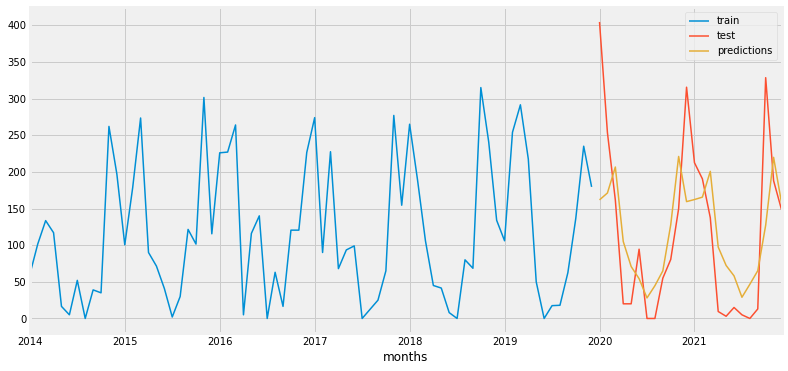

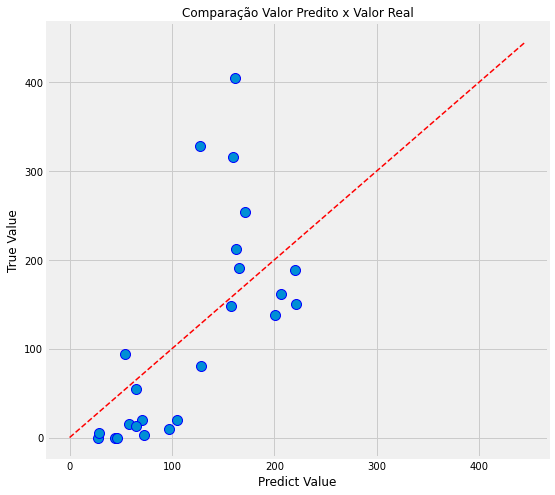

In [15]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(12,6))
data_train['monhtly_avg'].plot(ax=ax, label='train')
data_test['monhtly_avg'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

error_mse = mean_squared_error(
                y_true = data_test,
                y_pred = predictions
            )

error_mae = mean_absolute_error(
                y_true = data_test,
                y_pred = predictions
            )

rsmes.append(error_mse**0.5)

maes.append(error_mae)

print(f"Mean Absolute Error (MAE): {error_mae:.2f}")

print(f"Root Mean Squared Error (RSME): {error_mse**0.5:.2f}")

print(f"Correlation Coefficient: {r2_score(data_test, predictions):.2f}")
r2s.append(r2_score(data_test, predictions))




# Vamos criar um gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(predictions.values, data_test.values, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(data_test.values), 1.2*max(data_test.values),(max(data_test.values)-min(data_test.values))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

Random Forest baseLine (sem gridsearch) #apagar depois

In [18]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 3
             )

forecaster.fit(data_train['monhtly_avg'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3] 
Window size: 3 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2014-01-01 00:00:00'), Timestamp('2019-12-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-09-27 21:35:41 
Last fit date: 2022-09-27 21:35:41 
Skforecast version: 0.4.3 

In [19]:
# Predictions
# ==============================================================================
steps = 24
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2020-01-01    155.294
2020-02-01    155.925
2020-03-01    204.255
2020-04-01    192.975
2020-05-01    154.549
Freq: MS, Name: pred, dtype: float64

Mean Absolute Error (MAE): 120.64
Root Mean Squared Error (RSME): 137.09
Correlation Coefficient: -0.35


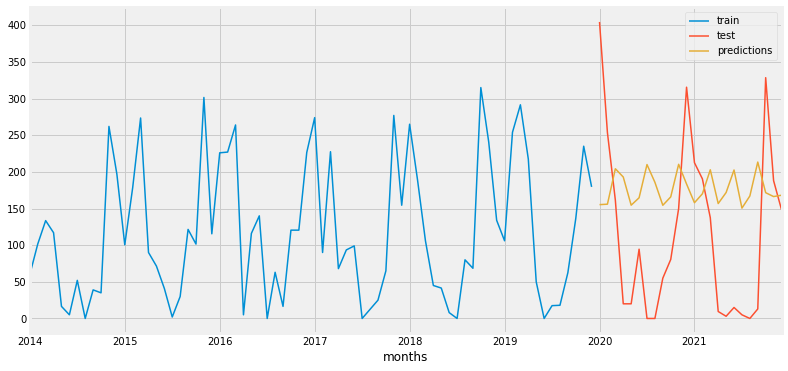

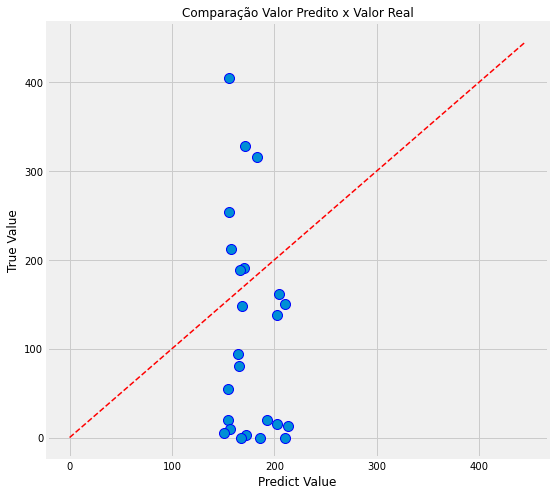

In [20]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(12,6))
data_train['monhtly_avg'].plot(ax=ax, label='train')
data_test['monhtly_avg'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();


error_mse = mean_squared_error(
                y_true = data_test,
                y_pred = predictions
            )

error_mae = mean_absolute_error(
                y_true = data_test,
                y_pred = predictions
            )

print(f"Mean Absolute Error (MAE): {error_mae:.2f}")

print(f"Root Mean Squared Error (RSME): {error_mse**0.5:.2f}")

print(f"Correlation Coefficient: {r2_score(data_test, predictions):.2f}")

# Vamos criar um gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(predictions.values, data_test.values, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(data_test.values), 1.2*max(data_test.values),(max(data_test.values)-min(data_test.values))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

Random Forest (com gridsearch) #apagar depois

In [21]:
# Hyperparameter Grid search
# ==============================================================================
steps = 24
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 3 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = range(2,9)

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [8, 10, 12],
             }

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['monhtly_avg'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 42


loop lags_grid: 100%|███████████████████████████████████████| 7/7 [01:15<00:00, 10.82s/it]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5 6 7] 
  Parameters: {'max_depth': 10, 'n_estimators': 100}
  Backtesting metric: 7162.66611782388



In [22]:
# Grid Search results
# ==============================================================================
results_grid.head()

lags                                  params  \
32  [1, 2, 3, 4, 5, 6, 7]  {'max_depth': 10, 'n_estimators': 100}   
34  [1, 2, 3, 4, 5, 6, 7]  {'max_depth': 12, 'n_estimators': 100}   
25     [1, 2, 3, 4, 5, 6]   {'max_depth': 8, 'n_estimators': 500}   
26     [1, 2, 3, 4, 5, 6]  {'max_depth': 10, 'n_estimators': 100}   
29     [1, 2, 3, 4, 5, 6]  {'max_depth': 12, 'n_estimators': 500}   

         metric  max_depth  n_estimators  
32  7162.666118         10           100  
34  7165.072277         12           100  
25  7206.822142          8           500  
26  7207.893096         10           100  
29  7214.053373         12           500

In [23]:
steps = 24
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2020-01-01    182.748667
2020-02-01    179.233667
2020-03-01    144.898750
2020-04-01     86.920139
2020-05-01     40.631389
Freq: MS, Name: pred, dtype: float64

Mean Absolute Error (MAE): 61.14
Root Mean Squared Error (RSME): 79.38
Correlation Coefficient: 0.55


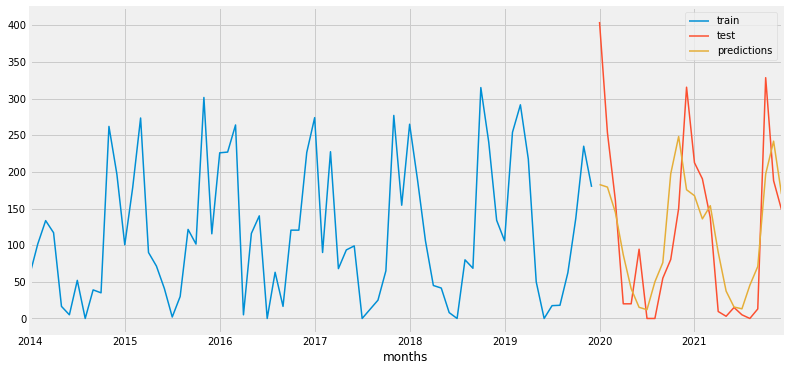

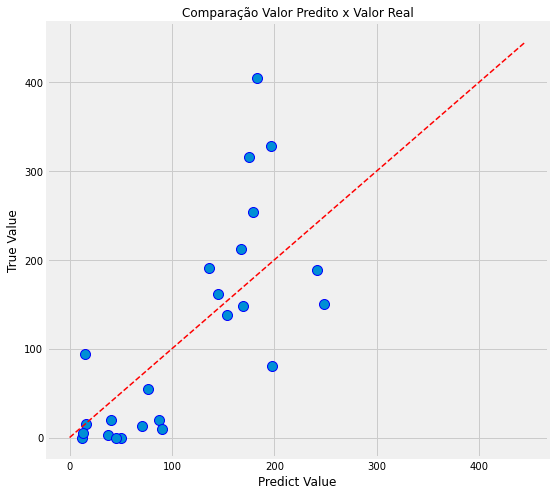

In [24]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(12,6))
data_train['monhtly_avg'].plot(ax=ax, label='train')
data_test['monhtly_avg'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();


error_mse = mean_squared_error(
                y_true = data_test,
                y_pred = predictions
            )

error_mae = mean_absolute_error(
                y_true = data_test,
                y_pred = predictions
            )

rsmes.append(error_mse**0.5)

maes.append(error_mae)

print(f"Mean Absolute Error (MAE): {error_mae:.2f}")

print(f"Root Mean Squared Error (RSME): {error_mse**0.5:.2f}")

print(f"Correlation Coefficient: {r2_score(data_test, predictions):.2f}")
r2s.append(r2_score(data_test, predictions))

# Vamos criar um gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(predictions.values, data_test.values, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(data_test.values), 1.2*max(data_test.values),(max(data_test.values)-min(data_test.values))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [33]:
rank = pd.DataFrame({
    'Model': ['SARIMA (AIC)', 
              'SARIMA (GridSearch)', 
              'Random Forest (GridSearch)'],
    'RSME': [f'{rsme:2f}' for rsme in rsmes],
    'MAE': [f'{mae:2f}' for mae in maes],
    'r² ': [f'{r2:2f}' for r2 in r2s]})
rank.sort_values(by='RSME', ascending = True).set_index('Model')

RSME        MAE       r² 
Model                                                     
Random Forest (GridSearch)  79.381235  61.143261  0.546326
SARIMA (GridSearch)         87.147594  66.972244  0.453212
SARIMA (AIC)                87.228653  67.352079  0.452194